<a href="https://colab.research.google.com/github/HImaya24/fdm/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing Techniques

**Technique 1 - Handling Missing Values**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load Titanic dataset from uploaded CSV
titanic = pd.read_csv('Titanic Dataset.csv')

# Check missing values
print(titanic.isnull().sum())

# Handle missing values in Age using mean
imputer = SimpleImputer(strategy='mean')
titanic['age'] = imputer.fit_transform(titanic[['age']])

# Show first 10 Ages after imputation
print(titanic['age'].head(10))


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64
0    29.00
1     0.92
2     2.00
3    30.00
4    25.00
5    48.00
6    63.00
7    39.00
8    53.00
9    71.00
Name: age, dtype: float64


**Technique 2 - Binning (Discretization)**

In [ ]:
# Define bins and labels
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Apply binning on Age
titanic['ageGroup'] = pd.cut(titanic['age'], bins=bins, labels=labels)

# Display first 15 rows of Age and Age Group
print(titanic[['age', 'ageGroup']].head(15))


      age     ageGroup
0   29.00  Young Adult
1    0.92        Child
2    2.00        Child
3   30.00  Young Adult
4   25.00  Young Adult
5   48.00        Adult
6   63.00       Senior
7   39.00        Adult
8   53.00        Adult
9   71.00       Senior
10  47.00        Adult
11  18.00         Teen
12  24.00  Young Adult
13  26.00  Young Adult
14  80.00       Senior


**Technique 3 - Feature Scaling / Normalization (Fare)**

/tmp/ipython-input-1569094816.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['fare'].fillna(titanic['fare'].mean(), inplace=True)


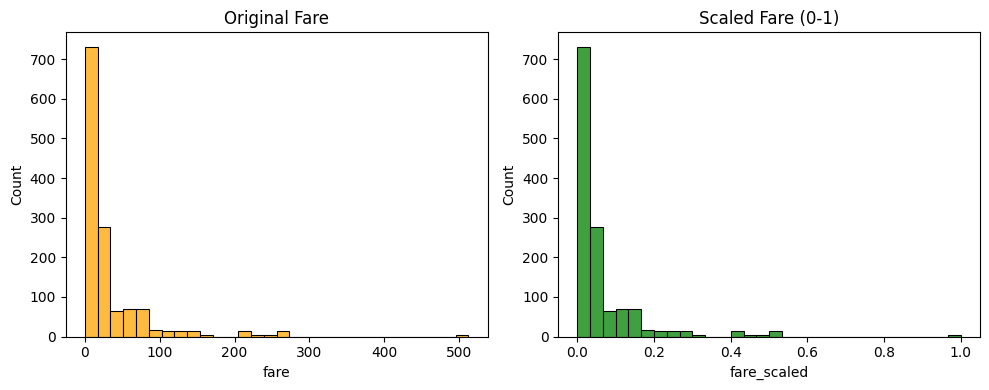

In [9]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load dataset
titanic = pd.read_csv("Titanic Dataset.csv")

# Handle missing values in 'fare' if any
titanic['fare'].fillna(titanic['fare'].mean(), inplace=True)

# Feature Scaling
scaler = MinMaxScaler()
titanic['fare_scaled'] = scaler.fit_transform(titanic[['fare']])

# Plot side-by-side histograms
plt.figure(figsize=(10,4))

# Original fare
plt.subplot(1,2,1)
sns.histplot(titanic['fare'], bins=30, color='orange')
plt.title('Original Fare')

# Scaled fare
plt.subplot(1,2,2)
sns.histplot(titanic['fare_scaled'], bins=30, color='green')
plt.title('Scaled Fare (0-1)')

plt.tight_layout()
plt.show()
